In [256]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

In [257]:
data = pd.read_csv('insurance.csv')

In [258]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [259]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(data.sex)
data.sex = label.transform(data.sex)
label.fit(data.smoker)
data.smoker = label.transform(data.smoker)
label.fit(data.region)
data.region = label.transform(data.region)

In [260]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [261]:
from sklearn import preprocessing# Get column names first
names = data.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
data = scaled_df

/home/ayushjain1144/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ayushjain1144/.local/lib/python3.5/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [262]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


# Linear Regression

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [264]:
x = data.drop(['charges', 'region'], axis = 1)
y = data.charges

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
lr = LinearRegression().fit(x_train, y_train)


In [266]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
train_rmse = mean_squared_error(y_train, y_pred_train)
test_rmse = mean_squared_error(y_test, y_pred_test)

In [267]:
print(train_rmse)



0.26059864406353433


In [268]:
print(test_rmse)

0.2200032210706655


In [269]:
y_pred = lr.predict(x)

In [270]:
import seaborn as sns

TypeError: 'Figure' object is not callable

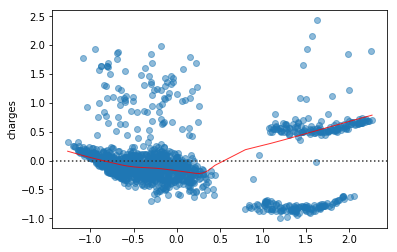

In [271]:
plt = sns.residplot(y_pred, y, data=data, lowess=True, scatter_kws={'alpha': 0.5}, line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})
fig = plt.figure()
fig.savefig('residual_plot.png', dpi=fig.dpi)

# Polynomial Basis Fucntion

In [216]:
from sklearn.preprocessing import PolynomialFeatures

In [222]:
def poly_reg(m):
    quad = PolynomialFeatures(degree = m)
    x_quad = quad.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x_quad, y, random_state = 0)

    plr1 = LinearRegression().fit(x_train, y_train)
    y_pred_train = plr1.predict(x_train)
    y_pred_test = plr1.predict(x_test)
    train_rmse = mean_squared_error(y_train, y_pred_train)
    test_rmse = mean_squared_error(y_test, y_pred_test)
    
    train_acc = plr1.score(x_train, y_train)
    test_acc = plr1.score(x_test, y_test)
    
    print("For m = " + str(m) + " :  training rmse = " + str(train_rmse) + ", test rmse = " + str(test_rmse) \
         + "train accuracy = " + str(train_acc) + " test accuracy = " + str(test_acc) )
    
    return train_rmse, test_rmse, train_acc, test_acc
    




In [223]:
x_coord = []
y_coord_train_rmse = []
y_coord_test_rmse = []
y_coord_train_acc = []
y_coord_test_acc = []

for i in range(1, 6):
    x_coord.append(i)
    a, b, c, d = poly_reg(i)
    y_coord_train_rmse.append(a)
    y_coord_test_rmse.append(b)
    y_coord_train_acc.append(c)
    y_coord_test_acc.append(d)

print(y_coord_train_rmse, y_coord_test_rmse)

For m = 1 :  training rmse = 0.2605986440635344, test rmse = 0.2200032210706655train accuracy = 0.732745261917263 test accuracy = 0.795217198048199
For m = 2 :  training rmse = 0.16774447460943137, test rmse = 0.12363274716907127train accuracy = 0.8279710710404151 test accuracy = 0.8849205013678012
For m = 3 :  training rmse = 0.16039669183282435, test rmse = 0.12780292830992585train accuracy = 0.8355065275985551 test accuracy = 0.8810388246609112
For m = 4 :  training rmse = 0.15188137511727837, test rmse = 0.12900672673834046train accuracy = 0.8442393387253466 test accuracy = 0.8799183082704866
For m = 5 :  training rmse = 0.13697239676075001, test rmse = 0.15260218055819733train accuracy = 0.8595291155393185 test accuracy = 0.8579552518977682
[0.2605986440635344, 0.16774447460943137, 0.16039669183282435, 0.15188137511727837, 0.13697239676075001] [0.2200032210706655, 0.12363274716907127, 0.12780292830992585, 0.12900672673834046, 0.15260218055819733]


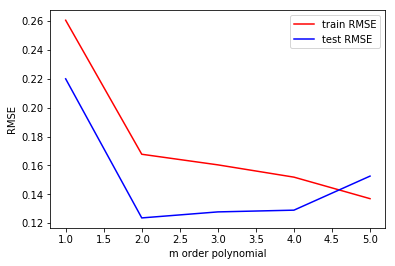

In [224]:
plt.plot(x_coord, y_coord_train_rmse, color='r', label = 'train RMSE')
plt.plot(x_coord, y_coord_test_rmse, color='b', label = 'test RMSE')
plt.legend(loc='best')
plt.xlabel('m order polynomial')
plt.ylabel('RMSE')
fig = plt.figure()
fig.savefig('RMSE-Polynomial.png', dpi=fig.dpi)
plt.show()

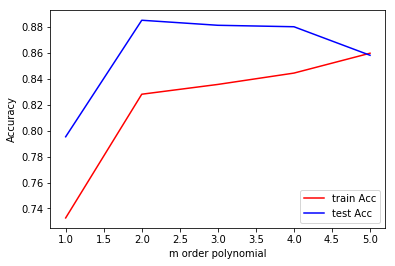

In [225]:
plt.plot(x_coord, y_coord_train_acc, color='r', label = 'train Acc')
plt.plot(x_coord, y_coord_test_acc, color='b', label = 'test Acc')
plt.legend(loc='best')
plt.xlabel('m order polynomial')
plt.ylabel('Accuracy')
fig = plt.figure()
fig.savefig('Acc-Polynomial.png', dpi=fig.dpi)
plt.show()

In [195]:
x.shape

(1338, 5)

# Gaussian Basis Functions

In [196]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
       
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        #print("inside")
        arg = (x - y) / width
        #print(arg)
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        #print(X)
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        print(self.centers_.shape)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        #print(self.width_.shape)
        return self
        
    def transform(self, X):
        
        #print(X.shape)
        #print(self.centers_.shape)
        #print(X.iloc[:, :, :, np.newaxis].shape, X.iloc[:, :, :, np.newaxis].head())
        return self._gauss_basis(np.dstack([X]*self.N), self.centers_.reshape((1, 5, self.N)),
                                 self.width_.reshape((1, 5, 1)), axis=2)

    


In [226]:
def gauss_function(m):
    #gauss = GaussianFeatures(m)
    #gauss.fit(x[:, np.newaxis], y)
   # x_gauss = gauss.transform(x_gauss)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
    #gauss_model = LinearRegression().fit(x_train, y_train)
    
    gauss_model = make_pipeline(GaussianFeatures(m),
                            LinearRegression())
    gauss_model.fit(x_train, y_train)
    #print(x_train,y_train)
    y_pred_test = gauss_model.predict(x_test)
    y_pred_train = gauss_model.predict(x_train)
    
   
    #y_pred_train = gauss_model.predict(x_train)
    #y_pred_test = gauss_model.predict(x_test)
    train_rmse = mean_squared_error(y_train, y_pred_train)
    test_rmse = mean_squared_error(y_test, y_pred_test)
    
    train_acc = gauss_model.score(x_train, y_train)
    test_acc = gauss_model.score(x_test, y_test)
    
    print("For m = " + str(m) + " :  training rmse = " + str(train_rmse) + ", test rmse = " + str(test_rmse) \
         + "train accuracy = " + str(train_acc) + " test accuracy = " + str(test_acc) )
    
    return train_rmse, test_rmse, train_acc, test_acc
    
 
   
    

In [227]:
## Need to debug this
x_coord = []
y_coord_train_rmse = []
y_coord_test_rmse = []
y_coord_train_acc = []
y_coord_test_acc = []

for i in range(2, 13):
    x_coord.append(i)
    a, b, c, d = gauss_function(i)
    y_coord_train_rmse.append(a)
    y_coord_test_rmse.append(b)
    y_coord_train_acc.append(c)
    y_coord_test_acc.append(d)

(2, 5)
For m = 2 :  training rmse = 0.269920103731211, test rmse = 0.22675175237929848train accuracy = 0.7231857176955887 test accuracy = 0.7889355484263628
(3, 5)
For m = 3 :  training rmse = 0.26988450885297155, test rmse = 0.23424062857606864train accuracy = 0.7232222217222892 test accuracy = 0.7819647729823427
(4, 5)
For m = 4 :  training rmse = 0.280951000411853, test rmse = 0.252116940682916train accuracy = 0.7118730747852751 test accuracy = 0.7653251925980662
(5, 5)
For m = 5 :  training rmse = 0.28632041645652, test rmse = 0.26260309797048076train accuracy = 0.7063665155173577 test accuracy = 0.7555644960927861
(6, 5)
For m = 6 :  training rmse = 0.29531554198816934, test rmse = 0.27395941013816033train accuracy = 0.6971416405122669 test accuracy = 0.7449938443804196
(7, 5)
For m = 7 :  training rmse = 0.3031637458799526, test rmse = 0.28321175062003695train accuracy = 0.68909298130663 test accuracy = 0.7363816058901378
(8, 5)
For m = 8 :  training rmse = 0.3087423408653438, te

### As we can see, fitting more than two gaussians on our data, seems to get bad results

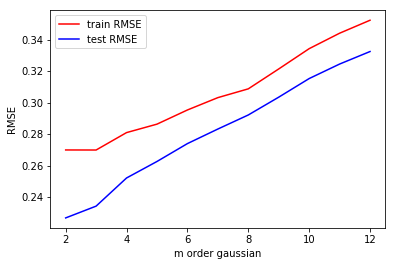

In [228]:
plt.plot(x_coord, y_coord_train_rmse, color='r', label = 'train RMSE')
plt.plot(x_coord, y_coord_test_rmse, color='b', label = 'test RMSE')
plt.legend(loc='best')
plt.xlabel('m order gaussian')
plt.ylabel('RMSE')
fig = plt.figure()
fig = plt.figure('RMSE-Gaussian.png', dpi=fig.dpi)
plt.show()

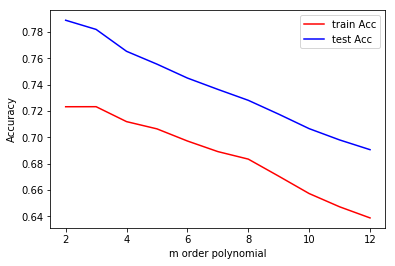

In [229]:
plt.plot(x_coord, y_coord_train_acc, color='r', label = 'train Acc')
plt.plot(x_coord, y_coord_test_acc, color='b', label = 'test Acc')
plt.legend(loc='best')
plt.xlabel('m order polynomial')
plt.ylabel('Accuracy')
fig = plt.figure()
fig = plt.figure('Acc-Gaussian.png', dpi=fig.dpi)
plt.show()

# Radial Basis Function

In [163]:
import math
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as numpy 


In [164]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [165]:
class Kmeans(object):

    def __init__(self, k=1):
        self.k = k

    def train(self, data, verbose=1):

        shape = data.shape

        ranges = np.zeros((shape[1], 2))
        centroids = np.zeros((shape[1], 2))

        for dim in range(shape[1]):
            ranges[dim, 0] = np.min(data[:,dim])
            ranges[dim, 1] = np.max(data[:,dim])

        if verbose == 1:
            print('Ranges: ')
            print(ranges)

        centroids = np.zeros((self.k, shape[1]))
        for i in range(self.k):
            for dim in range(shape[1]):
                centroids[i, dim] = np.random.uniform(ranges[dim, 0], ranges[dim, 1], 1)

        if verbose == 1:
            print('Centroids: ')
            print(centroids)

            plt.scatter(data[:,0], data[:,1])
            plt.scatter(centroids[:,0], centroids[:,1], c = 'r')
            plt.show()

        count = 0
        while count < 100:
            count += 1
            if verbose == 1:
                print('-----------------------------------------------')
                print('Iteration: ', count)

            distances = np.zeros((shape[0],self.k))
            for ix, i in enumerate(data):
                for ic, c in enumerate(centroids):
                    distances[ix, ic] = np.sqrt(np.sum((i-c)**2))

            labels = np.argmin(distances, axis = 1)

            new_centroids = np.zeros((self.k, shape[1]))
            for centroid in range(self.k):
                temp = data[labels == centroid]
                if len(temp) == 0:
                    return 0
                for dim in range(shape[1]): 
                    new_centroids[centroid, dim] = np.mean(temp[:,dim])

            if verbose == 1:
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()

            if np.linalg.norm(new_centroids - centroids) < np.finfo(float).eps:
                print("DONE!")
                break

            centroids = new_centroids
        self.centroids = centroids
        self.labels = labels
        if verbose == 1:
            print(labels)
            print(centroids)
        return 1

    def getAverageDistance(self, data):

        dists = np.zeros((len(self.centroids),))
        for ix, centroid in enumerate(self.centroids):
            temp = data[self.labels == ix]
            dist = 0
            for i in temp:
                dist += np.linalg.norm(i - centroid)
            dists[ix] = dist/len(temp)
        return dists

    def getLabels(self):
        return self.labels

In [172]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
 
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
        
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b

                loss = (y[i] - F).flatten() ** 2
                print('Loss: {0:.2f}'.format(loss[0]))

                # backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
                
    
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)   
     

In [174]:
def rbf_function(m):
   
    rbfnet = RBFNet(lr=1e-2, k=m)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
    

    rbfnet.fit(x_train, y_train)
    #print(x_train,y_train)
    y_pred_test = rbfnet.predict(x_test)
    y_pred_train = rbfnet.predict(x_train)
    
   
    train_rmse = mean_squared_error(y_train, y_pred_train)
    test_rmse = mean_squared_error(y_test, y_pred_test)
    
    train_acc = gauss_model.score(x_train, y_train)
    test_acc = gauss_model.score(x_test, y_test)
    
    print("For m = " + str(m) + " :  training rmse = " + str(train_acc) + ", test rmse = " + str(test_acc) \
         + "train accuracy = " + str(train_acc) + " test accuracy = " + str(test_acc) )
    
    return train_rmse, test_rmse, train_acc, test_acc

# Analysis


In [230]:
model_name_list = ['Linear Regression', 'Polynomial Regression',
                      'Gaussian Regression', 'Bayesian Linear Regression']
results = pd.DataFrame(columns=['rmse'], index = model_name_list)

results.ix['Linear Regression', :] = [0.22]
results.ix['Polynomial Regression', :] = [0.123]
results.ix['Gaussian Regression', :] = [0.2267]
results.ix['Bayesian Linear Regression', :] = [0.566]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Plea

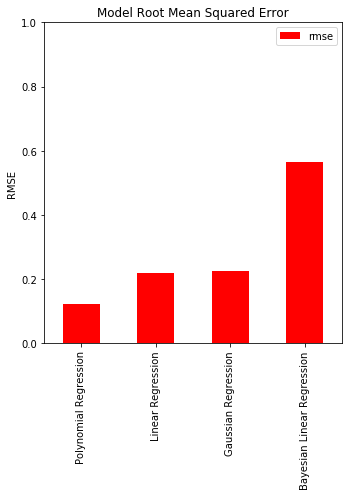

In [255]:
#figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
matplotlib.rcParams['font.size'] = 10
#plt.figure(figsize=(10,3))
f, ax = plt.subplots(figsize=(5,7))

#ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

axes = plt.gca()
axes.set_ylim([0,1])

fig = plt.figure()
fig = plt.figure('RMSE-Comparision.png', dpi=fig.dpi)

plt.tight_layout()